# Introduction

This notebook is an end-to-end data science process for predicting house price. This uses the Kaggle House Prices dataseet.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [3]:
# Read in the data 
df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv',index_col = 'Id')

# Exploratory Data Analysis

In [4]:
df.describe()

# The dataframe has 1460 rows and 80 columns, with SalePrice being the target variable (supervised learning).

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape

# 1460 rows, 80 columns

(1460, 80)

In [7]:
# Create a function to find the most correlated features
# Finds 10 most correlated features to the target column
def find_most_correlated_features(df, target_col, num_features=10):
      corr_with_target = df.corr()[target_col].abs().sort_values(ascending=False)
      most_correlated = corr_with_target.drop(target_col).head(num_features)
      return most_correlated

In [8]:
# Function to get only numerical features from the df.
def isolate_numerical_features(df):
  numerical_features = df.select_dtypes(include=['number'])
  return numerical_features

In [9]:
def isolate_categorical_features(df):
    categorical_features = df.select_dtypes(include=['object'])
    return categorical_features

In [10]:
df_numerical  = isolate_numerical_features(df)
df_numerical.shape

(1460, 37)

In [11]:
df_categorical = isolate_categorical_features(df)
df_categorical.shape

(1460, 43)

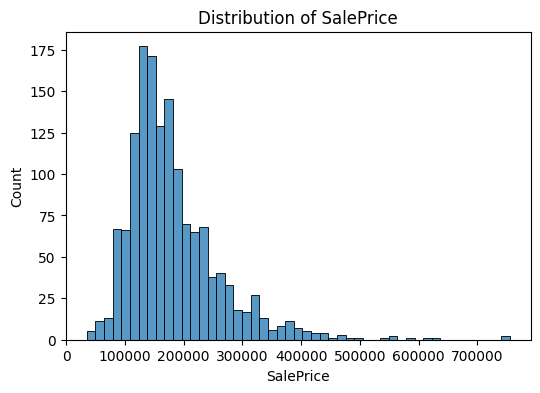

In [12]:
# Show distribution of the target variable: SalePrice
plt.figure(figsize=(6,4))
sns.histplot(df['SalePrice'])
plt.title('Distribution of SalePrice')
plt.show()

# Shows a right-skewed distribution where most of the houses are
# clustered around lower prices with fewer high-value outliers stretching the right tail.


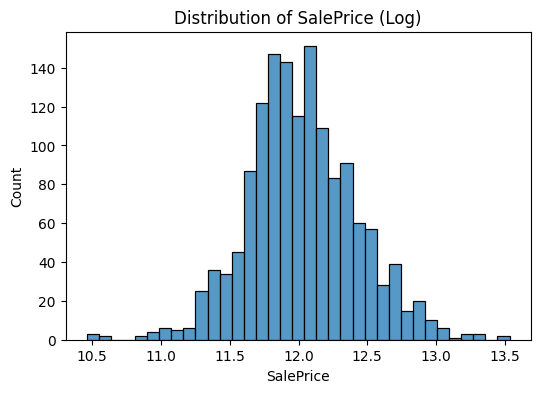

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(np.log(df['SalePrice']))
plt.title('Distribution of SalePrice (Log)')
plt.show()


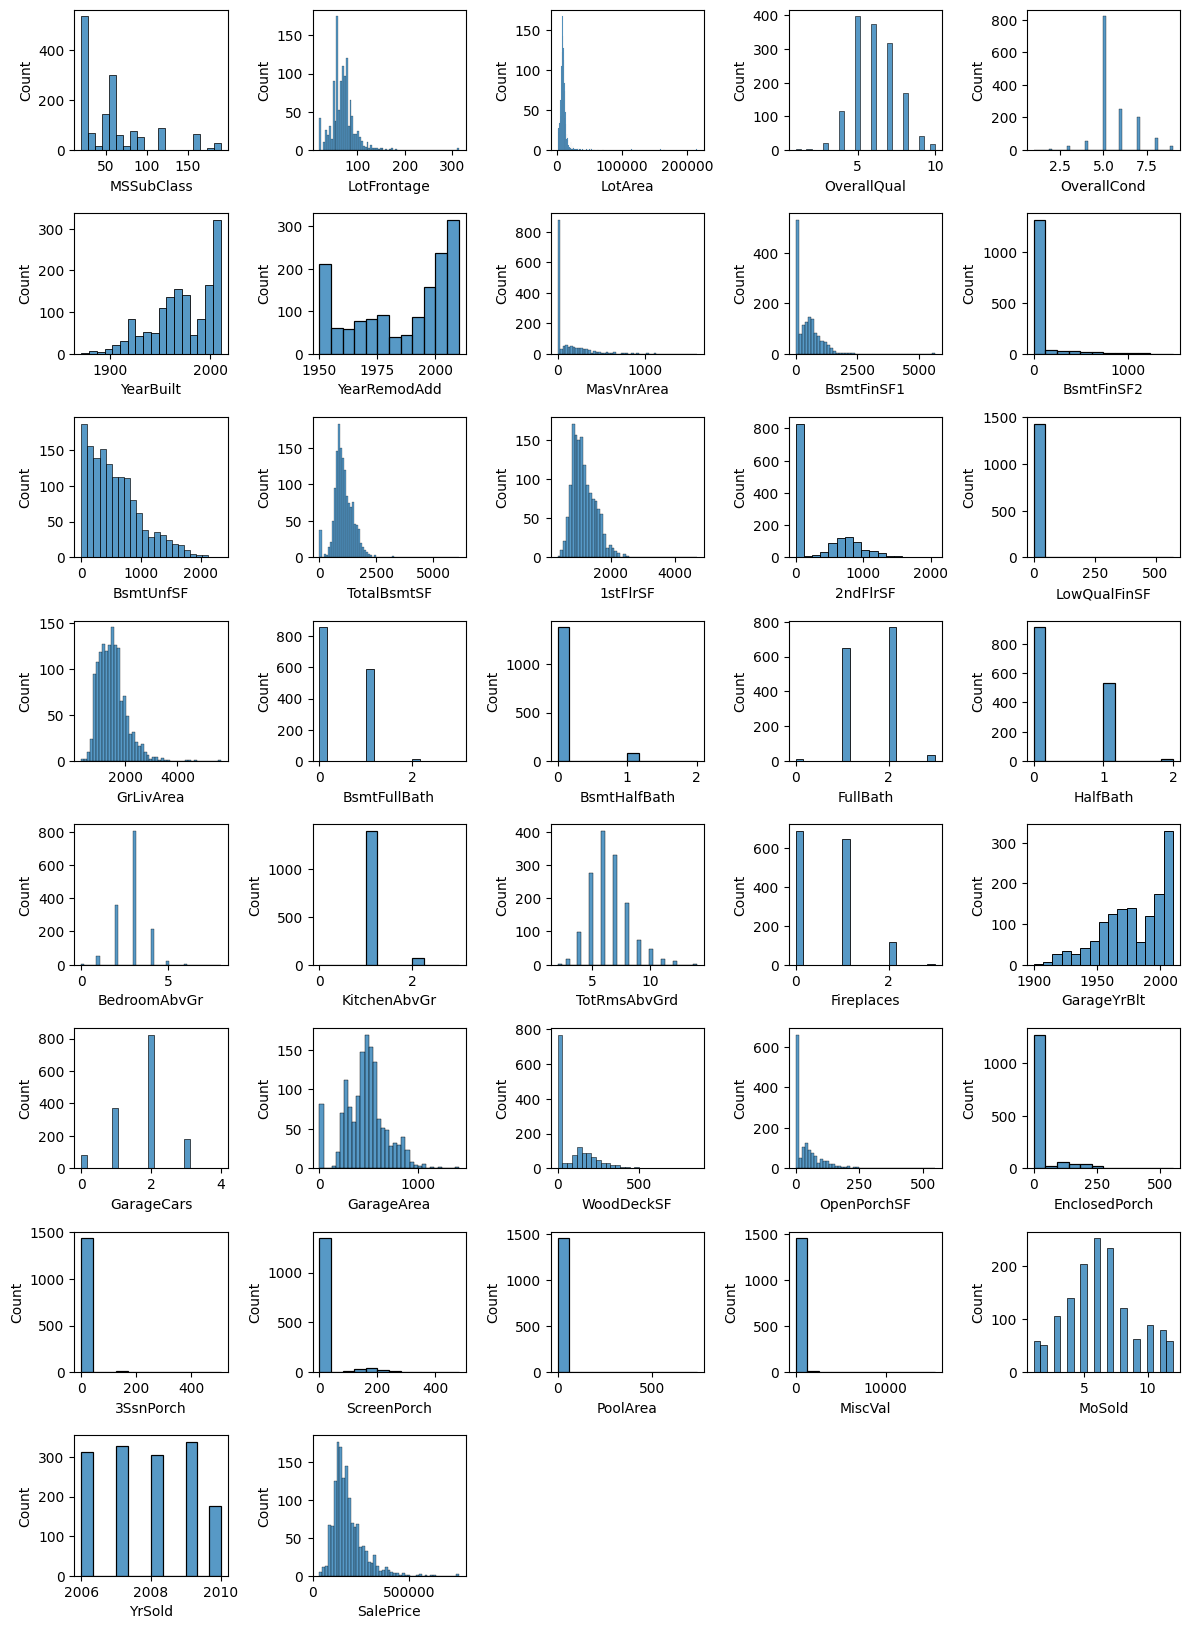

In [14]:
# Distirbution of numerical columns

fig = plt.figure(figsize=(12,18))
for i in range(len(df_numerical.columns)):
    fig.add_subplot(9,5,i+1)
    sns.histplot(df_numerical.iloc[:,i].dropna())
    plt.xlabel(df_numerical.columns[i])

plt.tight_layout()
plt.show()

# Check to see if any other numerical features need to be 
# log transformed.

Finding outliers

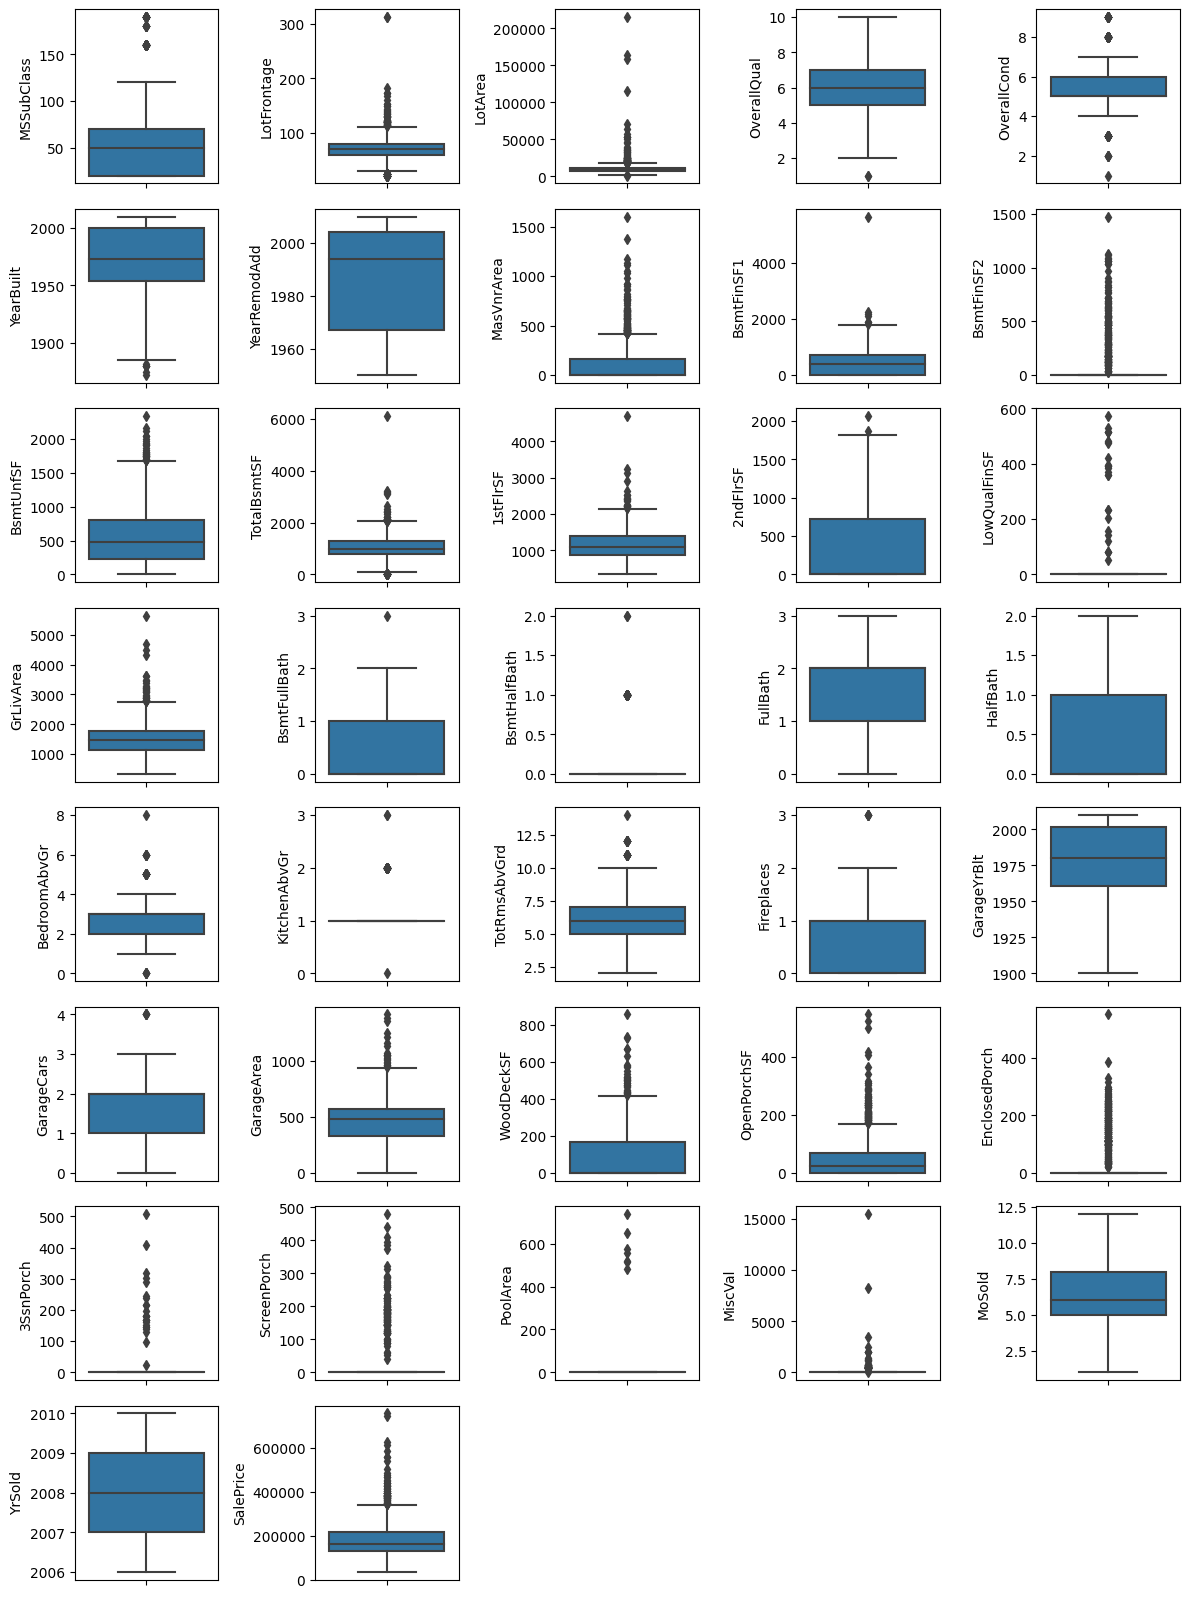

In [15]:
# Univariate
fig = plt.figure(figsize=(12, 18))

for i in range(len(df_numerical.columns)):
    fig.add_subplot(9, 5, i+1)
    sns.boxplot(y=df_numerical.iloc[:,i])

plt.tight_layout()
plt.show()

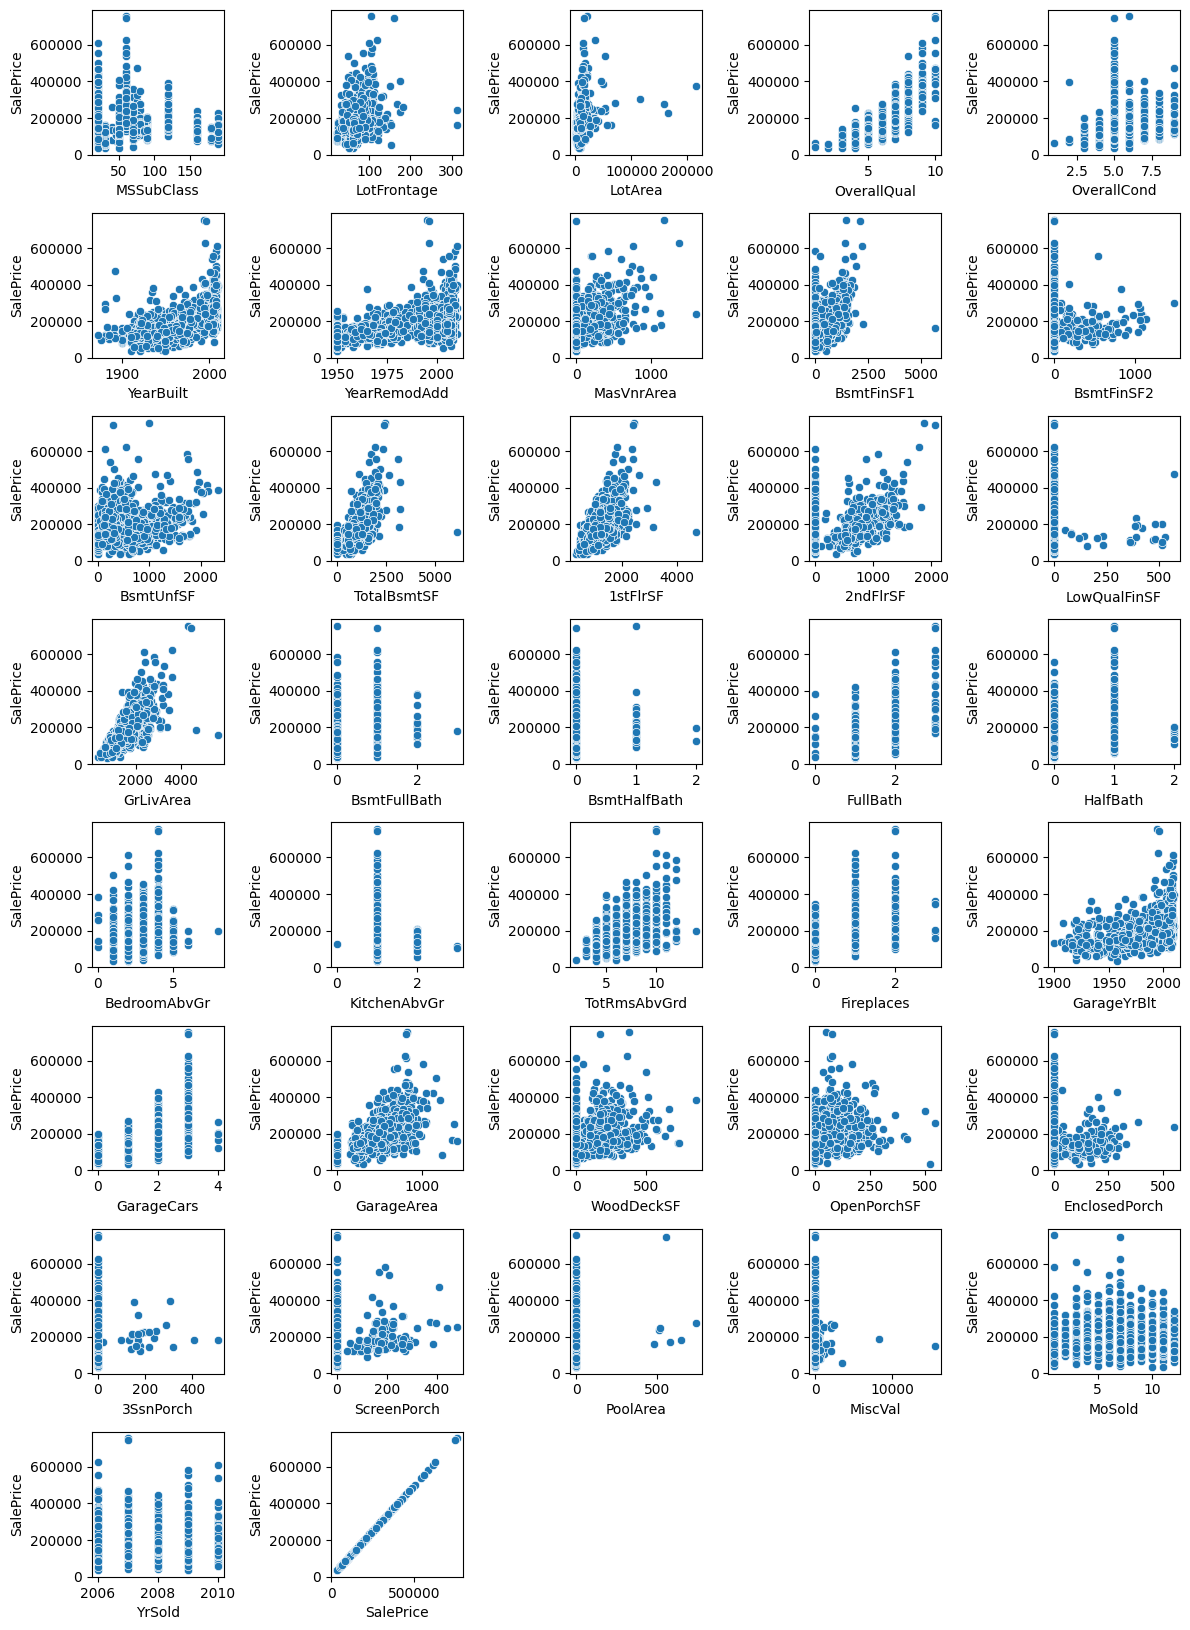

In [16]:
fig = plt.figure(figsize=(12,18))

for i in range(len(df_numerical.columns)):
    ax = fig.add_subplot(9,5,i+1)
    sns.scatterplot(x = df_numerical.iloc[:,i], y =df['SalePrice'])
    ax.set_xlabel(df_numerical.columns[i])
    ax.set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

In [17]:
# Find the x number of most correlated features to SalePrice
find_most_correlated_features(df_numerical,'SalePrice',num_features=20)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
Name: SalePrice, dtype: float64

In [18]:
# Checking for null, NaN values

df_numerical.isna().sum().sort_values(ascending=False).head(5)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
OpenPorchSF       0
KitchenAbvGr      0
dtype: int64

In [19]:
df_numerical.isnull().sum().sort_values(ascending=False).head()

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
OpenPorchSF       0
KitchenAbvGr      0
dtype: int64

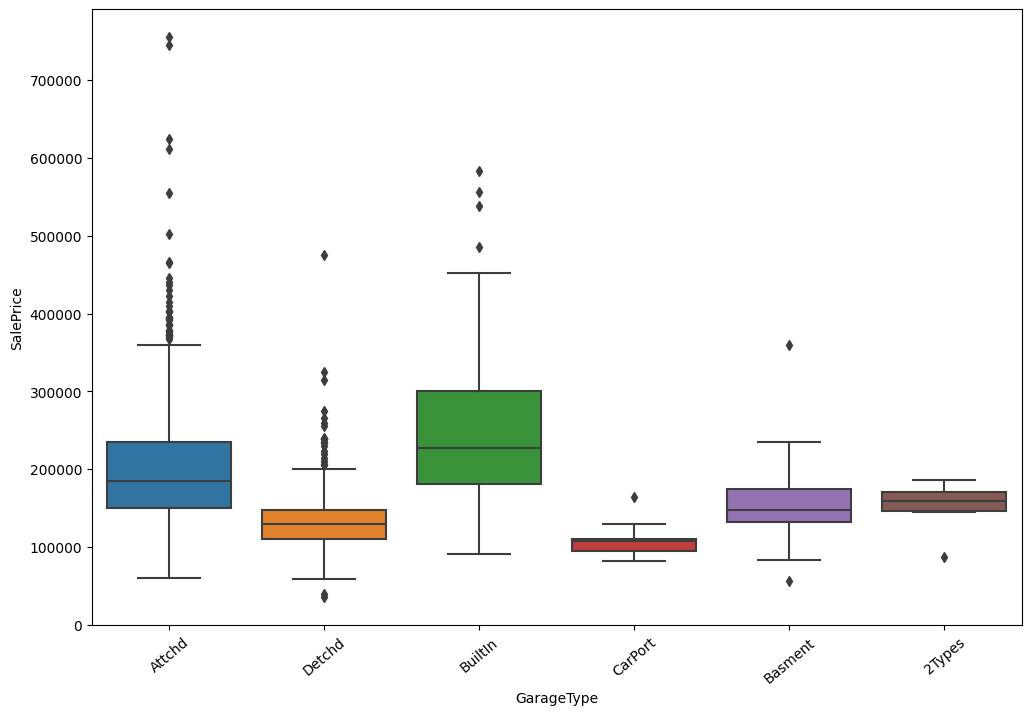

In [20]:
# Categorical columns
# df_categorical

f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=df['SalePrice'], x=df['GarageType'])
plt.xticks(rotation = 40)
plt.show()

In [21]:
df_categorical.isna().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageType        81
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
Electrical         1
KitchenQual        0
CentralAir         0
Functional         0
HeatingQC          0
dtype: int64

# Data Cleaning and Processing



In [22]:
### Deal with your null values ###

## Numerical columns ##
df_processed = df.copy()

# For the numerical columns:LotFrontage259,GarageYrBlt81,MasVnrArea8
df_processed['LotFrontage'] = df_processed.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Check to see if there is a garage
df_processed['HasGarage'] = df_processed['GarageType'].notna().astype(int)
df_processed.loc[(df_processed['HasGarage'] == 0) & (df['GarageYrBlt'].isna()), 'GarageYrBlt'] = df_processed['YearBuilt']
# Assumes the garage was built at the same as the house

df_processed['MasVnrArea'] = df_processed['MasVnrArea'].fillna(0)



In [23]:
## Categorical columns ##

cat_nulls = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','GarageType','GarageCond','GarageQual','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtQual','BsmtCond','Electrical']

for i in cat_nulls:
    df_processed[i] = df_processed[i].fillna('None', inplace=True)

In [24]:
# Deal with outliers

# Creates a boolean mask, uses it to select values from column and gets the index and drops them
df_processed = df_processed.drop(df_processed['LotFrontage'][df_processed['LotFrontage']>200].index)
df_processed = df_processed.drop(df_processed['LotArea'][df_processed['LotArea']>100000].index)
df_processed = df_processed.drop(df_processed['GrLivArea'][df_processed['GrLivArea']>4000].index)
df_processed = df_processed.drop(df_processed['BsmtFinSF1'][df_processed['BsmtFinSF1']>5000].index)
df_processed = df_processed.drop(df_processed['TotalBsmtSF'][df_processed['TotalBsmtSF']>5000].index)




In [25]:
df_processed['SalePrice'] = np.log(df_processed['SalePrice'])

# Feature Engineering

<Axes: >

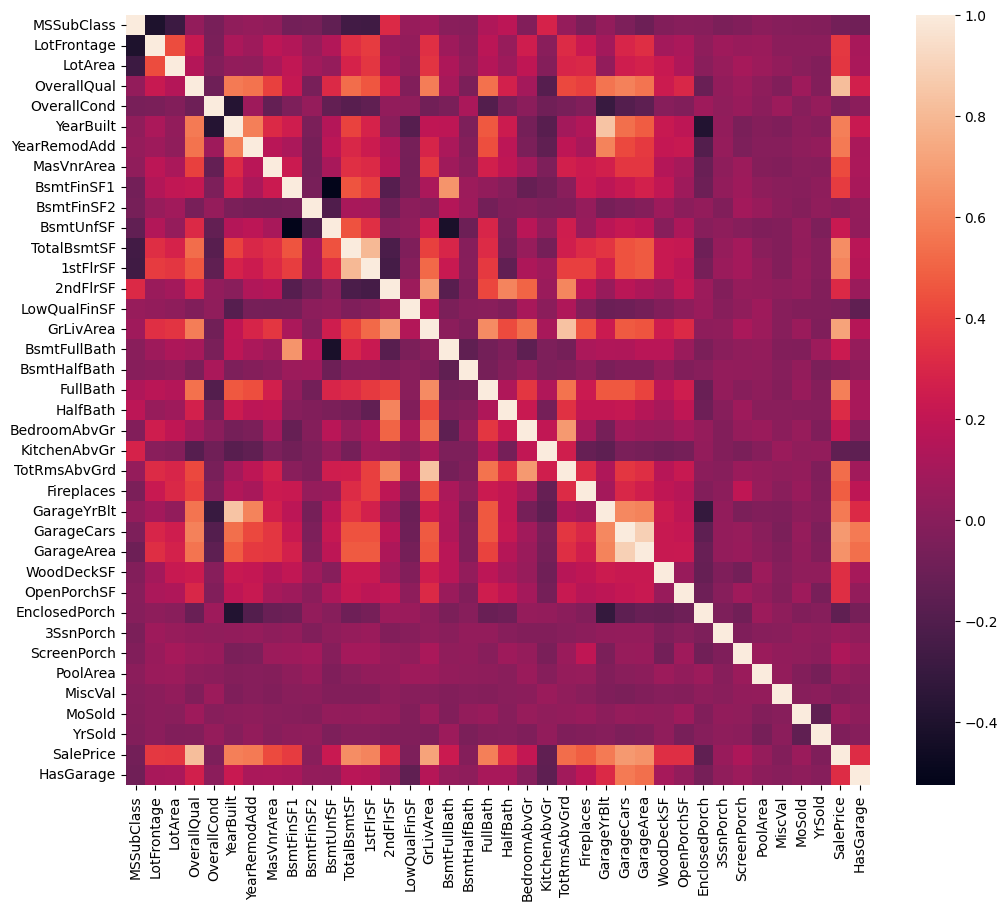

In [26]:
numeric_cols = df_processed.select_dtypes(include=['number']).columns


corr_matrix = df_processed[numeric_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix)

In [27]:
find_most_correlated_features(df_processed[numeric_cols],'SalePrice',num_features=20)

OverallQual     0.820971
GrLivArea       0.718064
GarageCars      0.681365
GarageArea      0.656334
TotalBsmtSF     0.640488
1stFlrSF        0.611166
YearBuilt       0.592079
FullBath        0.589899
GarageYrBlt     0.575551
YearRemodAdd    0.571239
TotRmsAbvGrd    0.534228
Fireplaces      0.483084
MasVnrArea      0.426632
BsmtFinSF1      0.379290
LotFrontage     0.366660
LotArea         0.359062
WoodDeckSF      0.332175
OpenPorchSF     0.329504
HasGarage       0.324945
HalfBath        0.316010
Name: SalePrice, dtype: float64

In [28]:
y = df_processed['SalePrice']

X = df_processed.drop('SalePrice', axis =1)

# One hot encoding to transform categorical dat
X = pd.get_dummies(X)

In [29]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 42)

imputer = SimpleImputer()
train_X = imputer.fit_transform(train_X)
val_X = imputer.transform(val_X)

# Build model

In [30]:
# Building a decision tree
from sklearn.tree import DecisionTreeRegressor

house_model = DecisionTreeRegressor(random_state =42)

In [31]:
#X = df[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath','LotArea']]
#y = df['SalePrice']

In [32]:
# Combine X and y for easier row-wise dropping
data = pd.concat([X, y], axis=1)

# Drop rows with any NaN values
data_cleaned = data.dropna()

In [33]:
data_cleaned.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,True,False,False,False,False,True,False,12.247694
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,True,False,False,False,False,True,False,12.109011
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,True,False,False,False,False,True,False,12.317167
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,True,True,False,False,False,False,False,11.849398
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,True,False,False,False,False,True,False,12.429216


In [34]:
X_cleaned = data_cleaned.iloc[:, :-1]  # Assuming the target is the last column
y_cleaned = data_cleaned.iloc[:, -1] # Target column is SalePrice.

In [35]:
# Split the cleaned data into train, test, cross-validation sets

#X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Get 60% of the dataset as the training set
X_train, X_, y_train, y_ = train_test_split(X_cleaned, y_cleaned, test_size = 0.4, random_state =42)
# Random state ensures that the split is the same every time you run the code, for reproducibility.

# Split the 40% subset into 20% for cross validation and 20% for test set 
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size =0.5, random_state=42)

# Delete temporary variables
del X_, y_

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (870, 218)
the shape of the training set (target) is: (870,)

the shape of the cross validation set (input) is: (290, 218)
the shape of the cross validation set (target) is: (290,)

the shape of the test set (input) is: (291, 218)
the shape of the test set (target) is: (291,)


In [36]:
house_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [37]:
# Make predictions
predictions = house_model.predict(X_test)

In [38]:
# Evaluate the model: MAE, MSE, RMSE
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)

print(MAE)
# With an MAE of 22,868, this means that on average my model's predictions are off by £22,688. Avg house price in dataset is £180,921. On average 12.5% error. 
print(MSE)
print(RMSE)
# RMSE of first iteration of the model is £33,189. RMSE penalises larger errors more heavily than MAE.

0.15260363199202423
0.05104575343890158
0.22593307291961834


In [39]:
# Improving the model through hyperparameter tuning
# Using GridSearchCV

from sklearn.model_selection import GridSearchCV

In [40]:
# Create a 2nd model that will use for hyperparameter training
# This is the model that will be tuned.

house_model_v2 = DecisionTreeRegressor(random_state=42)

In [41]:
# Parameters that we will vary with GridSearch.
# Parameter grid. It's a dictionary that specifies the hyperparemeters that will be tuned.

# Max_depth is the maximum depth of the tree.
# Min_samples_splt is the min number of samples required to split an internal node.
# Min_samples_leaf is the min number of samples required to be at a leaf node.
# Max_features is the number of features to consider when looking for the best split.

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None]  
}

In [42]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
# Have to choose a scoring metric to evaluate the performance of each hyperparameter combination.

# Using negative mean squared error as the scoring metric
scoring_metric = 'neg_mean_squared_error'

# Alternatively, to minimize MAE:
# scoring_metric = 'neg_mean_absolute_error'

# Or to maximize R-squared:
# scoring_metric = 'r2'

In [43]:
grid_search = GridSearchCV(estimator=house_model_v2,
                           param_grid=param_grid,
                           scoring=scoring_metric,
                           cv=5, # The number of cross-validation folds. Common values is 5 or 10.
                           n_jobs=-1, # uses all CPU cores
                           verbose=2) # Controls the amount of output during the search.

In [44]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error', verbose=2)

In [45]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 20}


In [46]:
print("Best Score:", grid_search.best_score_)

Best Score: -0.03919578179459894


In [47]:
best_model = grid_search.best_estimator_

In [48]:
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Performance on Test Set (Best Model):")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Performance on Test Set (Best Model):
Mean Squared Error: 0.037708523080556895
Mean Absolute Error: 0.13692980984042893
R-squared: 0.7713760008305944


In [49]:
print(np.sqrt(mse))

0.19418682519820157


In [50]:
# With GridSearch, I've gotten my MSE down to £46,444 from £50k and my MAE is now £28k down from £30k.